# Minimax Lower Bounds for Transfer Learning with Linear and One-hidden Layer Neural Networks

This Jupyter Notebook reproduces the numerical results in the paper *Minimax Lower Bounds for Transfer Learning with Linear and One-hidden Layer Neural Networks*. Before running this notebook, you need to install dependencies and download the datasets as described in the README. 

Each training task should take a couple of minutes to load the necessary training data before producing any output. 

Total run-time: about 15 minutes on a modern laptop.

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In the following cell, set **DATASET_PATH** to the root folder you downloaded the datasets. The location set by **CHECKPOINT_PATH** will be used to save trained models and output data (about 100MB total). 

In [2]:
DATASET_PATH = 'datasets' # Change this to the path to datasets root directory  
CHECKPOINTS_PATH = 'checkpoints'  # Checkpoints will be saved in this folder

First, we train a model on the source task *cat breeds*:

In [3]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'source_catbreeds/model')} \
            --data-path {os.path.join(DATASET_PATH,'catbreeds')} \
            --hidden-units 32 \
            --use-bias \
            --freeze-output-layer \
            --epochs 100 \
            --stop-at-acc 0.995 \
            --optimizer adam \
            --lr 0.0001 \
            --shuffle \
            --seed 0 

2020-05-29 12:28:45.839679: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:28:45.840046: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
_____

Now we train a separate model for each individual target task.
We use the saved source model to load the fixed output layer weights before training, and to make sure that target and source architectures match. The source model's trained weights are not used in any way.
Training *big cats*:

In [4]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'bigcats/model')} \
                        --data-path {os.path.join(DATASET_PATH,'bigcats')} \
                        --load-layer \
                        --layer-to-train hidden \
                        --source-checkpoint {os.path.join(CHECKPOINTS_PATH, 'source_catbreeds/model')} \
                        --stop-at-acc  0.995 \
                        --epochs 100 \
                        --optimizer adam \
                        --lr 0.0001 \
                        --shuffle \
                        --seed 0 

2020-05-29 12:30:20.431992: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:30:20.432371: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
___

 Training *dog breeds*:
 We switch two class labels in the *dog breeds* dataset to align similar classes with the source dataset.
 In *big cats* the default class labeling already provides a good alignment,
 and the other datasets are semantically too far from the source to
 find a good class alignment a priori.

In [5]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'dogbreeds/model')} \
                        --data-path {os.path.join(DATASET_PATH,'dogbreeds')} \
                        --load-layer \
                        --layer-to-train hidden \
                        --source-checkpoint {os.path.join(CHECKPOINTS_PATH, 'source_catbreeds/model')} \
                        --map-train-labels 1 0 2 3 4 \
                        --map-test-labels 1 0 2 3 4 \
                        --stop-at-acc  0.995 \
                        --epochs 100 \
                        --optimizer adam \
                        --lr 0.0001 \
                        --shuffle \
                        --seed 0 

2020-05-29 12:31:36.584293: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:31:36.584663: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
___

Training *butterflies*:

In [6]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'butterflies/model')} \
                        --data-path {os.path.join(DATASET_PATH,'butterflies')} \
                        --load-layer \
                        --layer-to-train hidden \
                        --source-checkpoint {os.path.join(CHECKPOINTS_PATH, 'source_catbreeds/model')} \
                        --stop-at-acc  0.995 \
                        --epochs 100 \
                        --optimizer adam \
                        --lr 0.0001 \
                        --shuffle \
                        --seed 0 

2020-05-29 12:32:40.527645: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:32:40.528054: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
___

Training *planes*:

In [7]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'planes/model')} \
                        --data-path {os.path.join(DATASET_PATH,'planes')} \
                        --load-layer \
                        --layer-to-train hidden \
                        --source-checkpoint {os.path.join(CHECKPOINTS_PATH, 'source_catbreeds/model')} \
                        --stop-at-acc  0.995 \
                        --epochs 100 \
                        --optimizer adam \
                        --lr 0.0001 \
                        --shuffle \
                        --seed 0 

2020-05-29 12:33:55.407284: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:33:55.407654: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
___

epoch 97: train mean loss = 0.002818961 train accuracy = 0.99135804
epoch 98: train mean loss = 0.0027094847 train accuracy = 0.99135804
epoch 99: train mean loss = 0.0027785886 train accuracy = 0.9907407
Final val loss = 0.14492278 val accuracy = 0.6498397
Final model distance:  16.40820744517008
Saving model...
Done!


The following cell collects results from previous models in order to reproduce results for Table 1 in the paper:

In [8]:
source_checkpoint =  os.path.join(CHECKPOINTS_PATH, 'source_catbreeds/model')
target_checkpoints = [os.path.join(CHECKPOINTS_PATH, 'dogbreeds/model'),
                      os.path.join(CHECKPOINTS_PATH, 'bigcats/model'),
                      os.path.join(CHECKPOINTS_PATH, 'butterflies/model'),
                      os.path.join(CHECKPOINTS_PATH, 'planes/model')]

for t in target_checkpoints:
    target_folder = str(Path(t).parent)
    save_path = target_folder+ '/results_'+ str(Path(t).name)+'.npz'
    results = np.load(save_path, allow_pickle=True)['arr_0'].item()
    final_val_loss = results['val_loss'][-1]
    dist = results['distance']
    print('Target ', t, ': distance= ', dist, ' final val. loss: ', final_val_loss)

Target  checkpoints/dogbreeds/model : distance=  11.618599329175604  final val. loss:  0.21942268
Target  checkpoints/bigcats/model : distance=  12.346081112236561  final val. loss:  0.1681584
Target  checkpoints/butterflies/model : distance=  13.476666987805517  final val. loss:  0.13667554
Target  checkpoints/planes/model : distance=  16.40820744517008  final val. loss:  0.14492278


Now we test how well the source model performs on the target tasks without using any target examples for training. Train on *cat breeds* and validate on *big cats*:

In [9]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'target_valid/catbreeds_to_bigcats/model')} \
                    --data-path {os.path.join(DATASET_PATH,'bigcats')} \
                    --mix-datasets \
                    --mix-data-path {os.path.join(DATASET_PATH,'catbreeds')} \
                    --hidden-units 32 \
                    --use-bias \
                    --freeze-output-layer \
                    --epochs 10 \
                    --val-freq 1 \
                    --optimizer adam \
                    --lr 0.0001 \
                    --shuffle \
                    --seed 0

2020-05-29 12:37:06.395180: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:37:06.395545: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
_____

Train on *cat breeds* and validate on *dog breeds*:

In [10]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'target_valid/catbreeds_to_dogbreeds/model')} \
                    --data-path {os.path.join(DATASET_PATH,'dogbreeds')} \
                    --mix-datasets \
                    --mix-data-path {os.path.join(DATASET_PATH,'catbreeds')} \
                    --hidden-units 32 \
                    --use-bias \
                    --freeze-output-layer \
                    --map-test-labels 1 0 2 3 4 \
                    --epochs 10 \
                    --val-freq 1 \
                    --optimizer adam \
                    --lr 0.0001 \
                    --shuffle \
                    --seed 0

2020-05-29 12:38:12.107167: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:38:12.107579: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
_____

Train on *cat breeds* and validate on *butterflies*:

In [11]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'target_valid/catbreeds_to_butterflies/model')} \
                    --data-path {os.path.join(DATASET_PATH,'butterflies')} \
                    --mix-datasets \
                    --mix-data-path {os.path.join(DATASET_PATH,'catbreeds')} \
                    --hidden-units 32 \
                    --use-bias \
                    --freeze-output-layer \
                    --epochs 10 \
                    --val-freq 1 \
                    --optimizer adam \
                    --lr 0.0001 \
                    --shuffle \
                    --seed 0

2020-05-29 12:39:17.594295: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:39:17.594700: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
_____

Train on *cat breeds* and validate on *planes*:

In [12]:
!python train_model.py --checkpoint-path {os.path.join(CHECKPOINTS_PATH, 'target_valid/catbreeds_to_planes/model')} \
                    --data-path {os.path.join(DATASET_PATH,'planes')} \
                    --mix-datasets \
                    --mix-data-path {os.path.join(DATASET_PATH,'catbreeds')} \
                    --hidden-units 32 \
                    --use-bias \
                    --freeze-output-layer \
                    --epochs 10 \
                    --val-freq 1 \
                    --optimizer adam \
                    --lr 0.0001 \
                    --shuffle \
                    --seed 0

2020-05-29 12:40:22.585946: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2020-05-29 12:40:22.586325: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
Input shape:  (1620, 25088)
Model: "one_hidden"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Linear)        multiple                  802848    
_________________________________________________________________
output_layer (Linear)        multiple                  165       
Total params: 803,013
Trainable params: 802,848
Non-trainable params: 165
_____

The following cell plots the results from the previous cells to reproduce Figure 1 in the paper.

/Users/zalan/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/zalan/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/zalan/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same ar

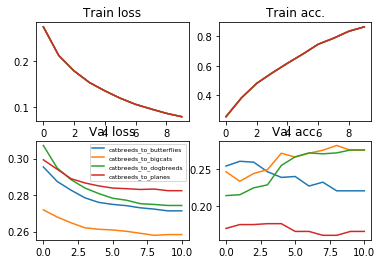

In [13]:
pathlist = Path(os.path.join(CHECKPOINTS_PATH, 'target_valid')).glob('**/*.npz')
results = []
target_dataset = []

for path in pathlist:
    r = np.load(path, allow_pickle=True)
    results.append(r['arr_0'].item())
    target_dataset.append(path.parent.name)

legend_dict= {}
for r, t in zip(results, target_dataset):
    train_loss = r['train_loss']
    train_acc = r['train_acc']
    val_loss = r['val_loss']
    val_acc = r['val_acc']

    plt.figure(0)
    plt.subplot(2, 2, 1)
    plt.plot(train_loss, label=t)
    plt.title('Train loss')

    plt.subplot(2, 2, 2)
    plt.plot(train_acc, label=t)
    plt.title('Train acc.')

    plt.subplot(2, 2, 3)
    plt.plot(val_loss, label=t)
    plt.legend(loc="upper right", prop={'size': 6})
    plt.title('Val loss')

    plt.subplot(2, 2, 4)
    plt.plot(val_acc)
    plt.title('Val acc.')